# Random Forest Feature Importance

This notebook demonstrates how to train a **Random Forest Classifier** and visualize **feature importance** using the Breast Cancer dataset from scikit-learn.

In [1]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
X.head()


Training samples: 398
Testing samples: 171


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=500, max_features=5, min_samples_split=4, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9707602339181286

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [6]:
cm=pd.crosstab(y_test,y_pred)
cm

col_0,0,1
row_0,,
0,59,4
1,1,107


In [7]:

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Show top 10 important features
print("\nTop 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]:30s} Importance: {importances[indices[i]]:.4f}")



Top 10 Important Features:
1. worst concave points           Importance: 0.1488
2. mean concave points            Importance: 0.1280
3. worst area                     Importance: 0.1195
4. worst perimeter                Importance: 0.1070
5. worst radius                   Importance: 0.0773
6. mean concavity                 Importance: 0.0607
7. worst concavity                Importance: 0.0405
8. mean perimeter                 Importance: 0.0402
9. mean area                      Importance: 0.0389
10. mean radius                    Importance: 0.0376


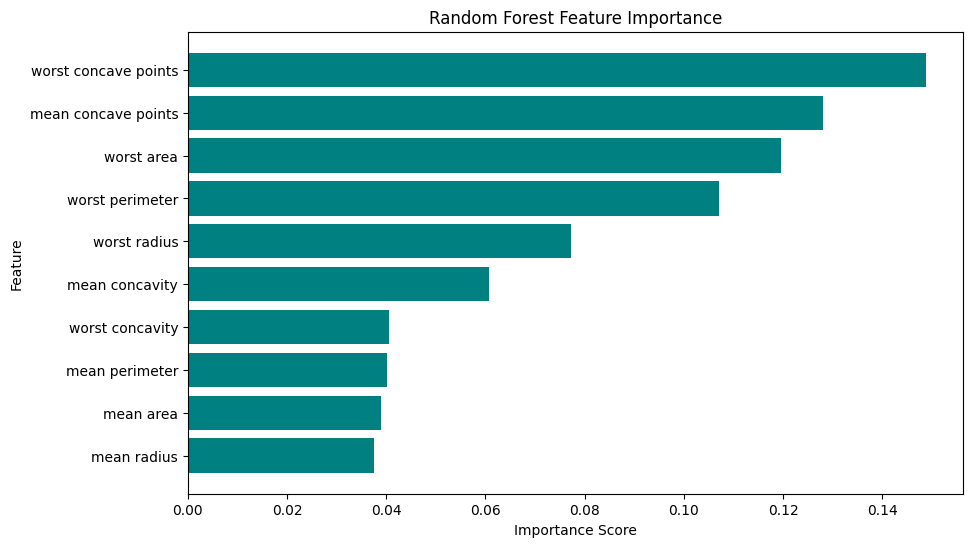

In [8]:

# Visualize feature importances
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.barh(range(10), importances[indices[:10]][::-1], color='teal')
plt.yticks(range(10), X.columns[indices[:10]][::-1])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



##  Explanation

- `rf.feature_importances_` shows how much each feature contributes to reducing impurity across trees.  
- Features with **higher scores** are more important in the model’s predictions.  
- The plot highlights the **top 10 features** driving classification decisions.


